In [1]:
import pandas as pd
import numpy as np
import pandas_profiling 
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv(r"/Users/viveksavita/Downloads/Participants_Data_TGIH/train.csv")
df_test = pd.read_csv(r"/Users/viveksavita/Downloads/Participants_Data_TGIH/test.csv")

print(df.head())
print(df_test.head())

   InvoiceNo  StockCode  Description  Quantity          InvoiceDate  \
0       6141       1583          144         3  2011-05-06 16:54:00   
1       6349       1300         3682         6  2011-05-11 07:35:00   
2      16783       2178         1939         4  2011-11-20 13:20:00   
3      16971       2115         2983         1  2011-11-22 12:07:00   
4       6080       1210         2886        12  2011-05-06 09:00:00   

   UnitPrice  CustomerID  Country  
0       3.75     14056.0       35  
1       1.95     13098.0       35  
2       5.95     15044.0       35  
3       0.83     15525.0       35  
4       1.65     13952.0       35  
   InvoiceNo  StockCode  Description  Quantity          InvoiceDate  \
0       3139       1709         1079         3  2011-02-22 15:22:00   
1        617        510         3457         1  2010-12-08 12:46:00   
2      14653        604          694        36  2011-10-25 13:53:00   
3       8634       1478         3473         2  2011-06-27 12:38:00   
4 

In [3]:
#df.profile_report()

In [4]:
def convert_date(df):
    df["InvoiceDate"] = df["InvoiceDate"].apply(lambda x : datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
    return df


df = convert_date(df)
df_test =     convert_date(df_test)      



In [5]:
print(df)

        InvoiceNo  StockCode  Description  Quantity         InvoiceDate  \
0            6141       1583          144         3 2011-05-06 16:54:00   
1            6349       1300         3682         6 2011-05-11 07:35:00   
2           16783       2178         1939         4 2011-11-20 13:20:00   
3           16971       2115         2983         1 2011-11-22 12:07:00   
4            6080       1210         2886        12 2011-05-06 09:00:00   
...           ...        ...          ...       ...                 ...   
284775       3408       1706         1081         6 2011-03-01 12:07:00   
284776      13982       2184         2947        16 2011-10-13 15:08:00   
284777       6641        667         3632         4 2011-05-16 12:59:00   
284778      13820       1576         3089        48 2011-10-11 14:18:00   
284779      11042       2603         1156         2 2011-08-22 13:30:00   

        UnitPrice  CustomerID  Country  
0            3.75     14056.0       35  
1            1.95

In [6]:
df.drop_duplicates(inplace=True)
print(len(df))
df_1 = df.copy()
df_1.reset_index(drop = True, inplace=True )

df_1.drop(columns=['InvoiceNo'], axis=1, inplace=True)
df_1.describe()
print(df_1)

df_1_col = df_1.columns
print(df_1_col)

for i in df_1_col:
    print(i)
    print(df_1[i].nunique())

282159
        StockCode  Description  Quantity         InvoiceDate  UnitPrice  \
0            1583          144         3 2011-05-06 16:54:00       3.75   
1            1300         3682         6 2011-05-11 07:35:00       1.95   
2            2178         1939         4 2011-11-20 13:20:00       5.95   
3            2115         2983         1 2011-11-22 12:07:00       0.83   
4            1210         2886        12 2011-05-06 09:00:00       1.65   
...           ...          ...       ...                 ...        ...   
282154       1706         1081         6 2011-03-01 12:07:00       1.65   
282155       2184         2947        16 2011-10-13 15:08:00       0.65   
282156        667         3632         4 2011-05-16 12:59:00       8.50   
282157       1576         3089        48 2011-10-11 14:18:00       3.45   
282158       2603         1156         2 2011-08-22 13:30:00       0.75   

        CustomerID  Country  
0          14056.0       35  
1          13098.0       35  
2 

KeyError: 'Column not found: InvoiceNo'

      StockCode  Quantity
0             0       574
1             1       190
2             2       128
3             3         5
4             4        12
...         ...       ...
3614       3679      -927
3615       3680        14
3616       3681      1932
3617       3682         4
3618       3683      2104

[3619 rows x 2 columns]


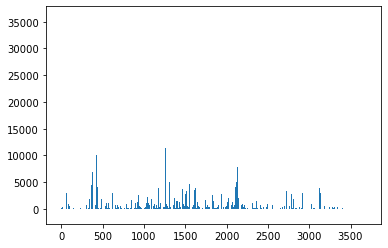

In [8]:
df_bar_quant= pd.DataFrame(df_1.groupby(["StockCode"])["Quantity"].sum())
df_bar_quant.reset_index(inplace=True)
print(df_bar_quant)

plt.bar(df_bar_quant["StockCode"], df_bar_quant["Quantity"] )
plt.show()


   StockCode  Quantity
0          0       249
1          1       101
2          2        64
3          4         4
4          5         5


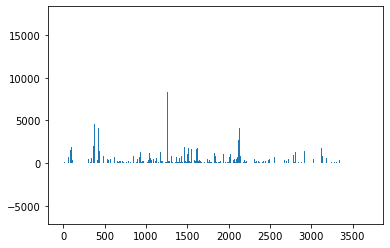

In [9]:
df_test_quant=pd.DataFrame(df_test.groupby(["StockCode"])["Quantity"].sum())
df_test_quant.reset_index(inplace=True)
print(df_test_quant.head())

plt.bar(df_test_quant["StockCode"], df_test_quant["Quantity"] )
plt.show()

In [10]:

print(df_1.dtypes)
   

df_1.dtypes
print(len(df_1))
print(df_1)
#df_1.InvoiceDate.month

stockcodemean = df_1.groupby(['StockCode'])['UnitPrice'].mean()
print(stockcodemean)
countrymean = df_1.groupby(['Country'])['UnitPrice'].mean()
print(stockcodemean)

df_1.loc[:, "stockcodeencoded"] = df_1['StockCode'].map(stockcodemean)
df_1.loc[:, "countryencoded"] = df_1['Country'].map(stockcodemean)

print(df_1)











StockCode               int64
Description             int64
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                 int64
dtype: object
282159
        StockCode  Description  Quantity         InvoiceDate  UnitPrice  \
0            1583          144         3 2011-05-06 16:54:00       3.75   
1            1300         3682         6 2011-05-11 07:35:00       1.95   
2            2178         1939         4 2011-11-20 13:20:00       5.95   
3            2115         2983         1 2011-11-22 12:07:00       0.83   
4            1210         2886        12 2011-05-06 09:00:00       1.65   
...           ...          ...       ...                 ...        ...   
282154       1706         1081         6 2011-03-01 12:07:00       1.65   
282155       2184         2947        16 2011-10-13 15:08:00       0.65   
282156        667         3632         4 2011-05-16 12:59:00       8.50   
282157       1576  

In [11]:
cat_col = ['Country']#,'invoice_month','invoice_year']  #['StockCode','Description','CustomerID','Country' ] #,'invoice_month','invoice_year']
con_col = ['Quantity','StockCode']
target = ['UnitPrice']


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

features = cat_col + con_col
print(features)

df_feature = df_1[features]
df_label = df_1[target]

print(df_feature.head())
print(df_label.head())




['Country', 'Quantity', 'StockCode']
   Country  Quantity  StockCode
0       35         3       1583
1       35         6       1300
2       35         4       2178
3       35         1       2115
4       35        12       1210
   UnitPrice
0       3.75
1       1.95
2       5.95
3       0.83
4       1.65


In [13]:
# Train and test split
X_train, X_test,y_train,y_test = train_test_split(df_feature,df_label, random_state=20)


from sklearn.preprocessing import StandardScaler , OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [14]:
con_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps =[('onehotencoding',OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
    ('num', con_transformer , con_col),
    ('cat',cat_transformer,cat_col)
])



lr = Pipeline(
    steps=[('prep', preprocessor),
           ('regression',LinearRegression())    
])


regressors = [#LinearRegression(),
             #Lasso(),
             #ElasticNet(),
             #DecisionTreeRegressor(),
             #KNeighborsRegressor(),
             GradientBoostingRegressor()
]


for reg in regressors:
    lr = Pipeline(
        steps=[('prep', preprocessor),
               ('regression',    reg)
              ])
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    print(reg,np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    






/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'metrics' is not defined

In [16]:
from sklearn import metrics
df_test_feature = df_test[features]


print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(y_pred)
final_pred = pd.DataFrame(lr.predict(df_test_feature), columns=['UnitPrice'])

print(final_pred)

print(len(final_pred))

final_pred.to_csv(r"/Users/viveksavita/predictions7.csv", index=False, header=True)

19.76037640822139
[4.28230515 3.25779621 3.41118394 ... 1.37750347 3.53220054 3.05149078]
        UnitPrice
0        3.461521
1        3.567425
2        1.321431
3        4.785725
4        4.020426
...           ...
122044   1.732310
122045   1.526315
122046   2.407753
122047   5.044934
122048   3.488508

[122049 rows x 1 columns]
122049


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer



In [ ]:
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data_trans = kbins.fit_transform(df_label)
print(data_trans)
bins = pd.DataFrame(data_trans, columns=['label'])
bins.reset_index(inplace=True)
print(bins)
print(df_1)


#plt.hist(data_trans, bins=10)
#plt.show()

In [ ]:
df_2 = pd.concat([df_1 , bins], axis=1 , join = 'inner' )
print(df_2)

stockcodemean = df_2.groupby(['StockCode'])['UnitPrice'].mean()
print(stockcodemean)

df_2.loc[:, "stockcodeencoded"] = df_2['StockCode'].map(stockcodemean)

print(df_2)




